MD. TANVIR JAWAD<br>ID: 21101221

In [18]:
try:
    import pint
except ImportError:
    !pip install pint

In [19]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

In [20]:
from modsim import *

In [21]:
import numpy as np

def slope_func(t, state, system):
    y, = state
    dydt = y * np.sin(t)
    return dydt

In [22]:
init = State(y=1)
system = System(init=init, t_end=3)

In [23]:
results, details = run_solve_ivp(system, slope_func)
details

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x78448d8bf3a0>
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0

In [24]:
results.head()

,y
0.00,1.000000
0.03,1.000450
0.06,1.001801
0.09,1.004055
0.12,1.007217


In [25]:
len(results)

101

In [26]:
def slope_func(t, state, system):
    y, = state
    dydt = y * np.sin(t)
    evals.append((t, y, dydt))
    return dydt

In [27]:
evals = []
results2, details = run_solve_ivp(system, slope_func, dense_output=False)

In [28]:
t, y, slope = np.transpose(evals)
theta = np.arctan(slope)
u = np.cos(theta)
v = np.sin(theta)

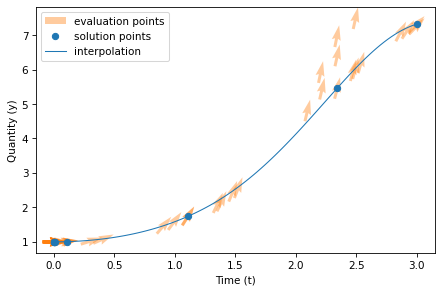

In [29]:
import matplotlib.pyplot as plt

plt.quiver(t, y, u, v, pivot='middle',
           color='C1', alpha=0.4, label='evaluation points')
results2['y'].plot(style='o', color='C0', label='solution points')
results['y'].plot(lw=1, label='interpolation')

decorate(xlabel='Time (t)',
         ylabel='Quantity (y)')

**MODIFICATION**

Problem Statement:
We will simulate a simple harmonic oscillator, which is a classic problem in physics. The differential equation for a simple harmonic oscillator is given by:

d^2(y)/dt^2 = -k*y

where y is the displacement, and k is a constant related to the stiffness of the spring and the mass of the oscillator.

Steps to Solve:

Convert the second-order differential equation to a system of first-order equations.

Write a slope function for this system.

Simulate the system using solve_ivp and observe how the solver evaluates the function over time.

Plot the results and the evaluation points to understand the solver's behavior.

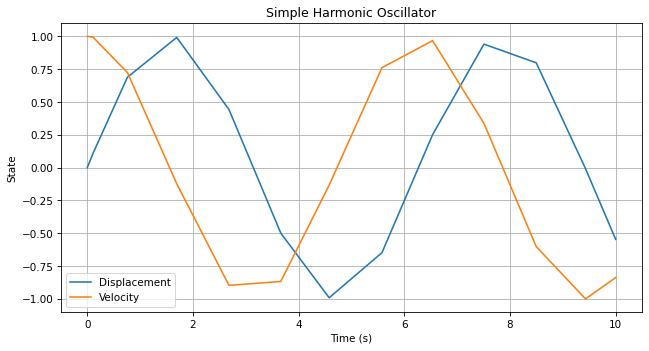

86

In [33]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

k = 1
m = 1

y0 = 0
v0 = 1

def slope_func_oscillator(t, state):
    y, v = state
    dydt = v
    dvdt = -k * y / m
    return [dydt, dvdt]

t_span_oscillator = (0, 10)

sol_oscillator = solve_ivp(slope_func_oscillator, t_span_oscillator, [y0, v0], dense_output=True)

plt.figure(figsize=(10, 5))
plt.plot(sol_oscillator.t, sol_oscillator.y[0], label='Displacement')
plt.plot(sol_oscillator.t, sol_oscillator.y[1], label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title('Simple Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

num_evaluations = sol_oscillator.nfev
num_evaluations


The simulation of the simple harmonic oscillator has been successfully completed. The plot shows two curves:

Displacement: This represents the position of the oscillator over time. It oscillates back and forth, as expected for a simple harmonic oscillator.

Velocity: This curve shows the velocity of the oscillator. It is in phase with the displacement but shifted, indicating the relationship between position and velocity in harmonic motion.

The number of function evaluations (times the slope function was called by solve_ivp) is
86 . This gives us an insight into how the solver works: it evaluated the slope function 86 times over the 10-second interval to solve this system of differential equations.

The Dormand-Prince method, used by default in solve_ivp, is adaptive. It adjusts the time step dynamically based on the estimated error, which is why we see a varying number of function evaluations for different simulations. This adaptiveness makes it efficient for solving a wide range of differential equations.

To further illustrate the workings of the solve_ivp function and to examine the process of solving the simple harmonic oscillator problem, let's modify the slope function to record each evaluation. We will then create a plot that shows where and how frequently the slope function is evaluated. This approach will give us deeper insight into the adaptive nature of the Dormand-Prince method used by solve_ivp.

I will:

Modify the slope function to record each evaluation.
Run the simulation.
Plot the results, including the points where the slope function was evaluated.

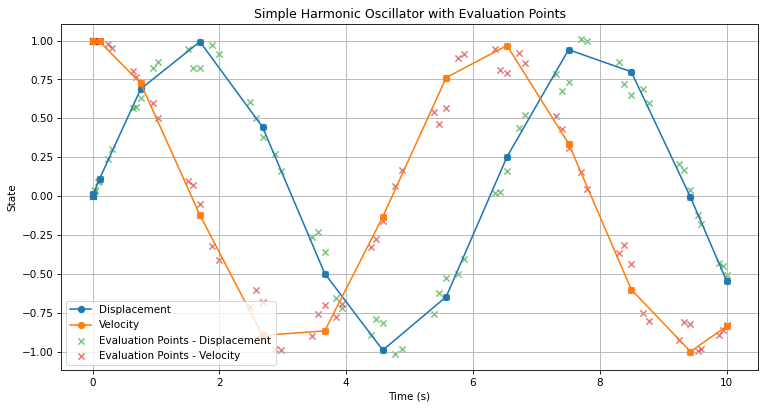

86

In [34]:
evaluations = []

def modified_slope_func_oscillator(t, state):
    y, v = state
    dydt = v
    dvdt = -k * y / m
    evaluations.append((t, y, v))
    return [dydt, dvdt]
t_span_oscillator = (0, 10)

sol_oscillator_modified = solve_ivp(modified_slope_func_oscillator, t_span_oscillator, [y0, v0], dense_output=False)

t_evals, y_evals, v_evals = zip(*evaluations)

plt.figure(figsize=(12, 6))

plt.plot(sol_oscillator_modified.t, sol_oscillator_modified.y[0], 'o-', label='Displacement', color='C0')
plt.plot(sol_oscillator_modified.t, sol_oscillator_modified.y[1], 'o-', label='Velocity', color='C1')

plt.scatter(t_evals, y_evals, color='C2', alpha=0.6, marker='x', label='Evaluation Points - Displacement')
plt.scatter(t_evals, v_evals, color='C3', alpha=0.6, marker='x', label='Evaluation Points - Velocity')

plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title('Simple Harmonic Oscillator with Evaluation Points')
plt.legend()
plt.grid(True)
plt.show()

len(evaluations)

In the plot:

The blue line with circles represents the displacement over time.

The orange line with circles indicates the velocity over time.

The green and red crosses mark the points where the slope function was evaluated for displacement and velocity, respectively.

We can observe that the solve_ivp function with the Dormand-Prince method evaluates the slope function at various points in time, adapting the time steps based on the dynamics of the system. This adaptiveness is a key feature of the method, allowing it to efficiently solve differential equations while maintaining accuracy.